<a href="https://colab.research.google.com/github/Pasindu457825/Deep-Learning-Lab_06/blob/main/IT22126306_NetworkX_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SE4050 - Lab 8**

 We highly recommend you to run this notebook, so you can get familiar with the basic concepts of graphs and networks.

In this Colab, we will introduce a graph related package, [NetworkX](https://networkx.org/documentation/stable/).

NetworkX is one of the most frequently used Python packages to create, manipulate, and mine graphs.

Main parts of this tutorial are adapted from https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/libraries/NetworkX.ipynb#scrollTo=zA1OO6huHeV6

Please make a copy before you proceed.

In [1]:
# Upgrade packages
!pip install --upgrade scipy networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 32.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1


In [2]:
# Import the NetworkX package
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Graph
NetworkX provides several classes to store different types of graphs, such as directed and undirected graph. It also provides classes to create multigraphs (both directed and undirected).

For more information, please refer to [NetworkX graph types](https://networkx.org/documentation/stable/reference/classes/index.html).

In [3]:
# Create an undirected graph G
G = nx.Graph()
print(G.is_directed())

# Create a directed graph H
H = nx.DiGraph()
print(H.is_directed())

# Add graph level attribute
G.graph["Name"] = "Bar"
print(G.graph)

False
True
{'Name': 'Bar'}


## Node

Nodes (with attributes) can be easily added to NetworkX graphs.

In [4]:
# Add one node with node level attributes
G.add_node(0, feature=5, label=0)

# Get attributes of the node 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 5, 'label': 0}


In [5]:
G.nodes(data=True)

NodeDataView({0: {'feature': 5, 'label': 0}})

In [6]:
# Add multiple nodes with attributes
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
]) #(node, attrdict)

# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
  print(node)

# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 5, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


## Edge

Similar to nodes, edges (with attributes) can also be easily added to NetworkX graphs.

In [7]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)

# Get attributes of the edge (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [8]:
# Add multiple edges with edge weights
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
for edge in G.edges():
  print(edge)

# Get number of edges
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1)
(0, 2)
(1, 2)
G has 3 edges


## Visualization

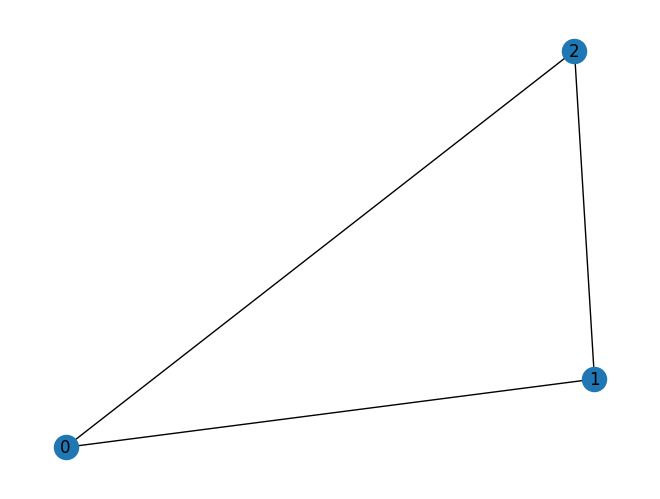

In [9]:
# Draw the graph
nx.draw(G, with_labels = True)

## Node Degree and Neighbor

In [10]:
node_id = 1

# Degree of node 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbor of node 1
for neighbor in G.neighbors(node_id):
  print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


## Random Graph creation and analysis

In [11]:
# creation of a random network with N nodes and E edges - this a erdos-renyi graph
def create(n,m):
    G = nx.gnm_random_graph(n, m, seed = random_state)
    return G

In [12]:
def degree_analysis(G):
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(2, 4)


    ax1 = fig.add_subplot(axgrid[:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    ax2 = fig.add_subplot(axgrid[:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")

    plt.show()

In [13]:
random_state = np.random.RandomState(42)
N=10 #number of nodes
E=2*N #number of edges
G=create(N,E)

In [14]:
print(G.edges(nbunch=4))
print(G.adj)
print(G.edges)
print(type(G))
print(len(G.edges))

[(4, 7), (4, 5), (4, 0), (4, 2), (4, 6)]
{0: {4: {}, 8: {}}, 1: {7: {}, 5: {}, 3: {}, 8: {}}, 2: {6: {}, 7: {}, 9: {}, 8: {}, 4: {}}, 3: {6: {}, 7: {}, 1: {}}, 4: {7: {}, 5: {}, 0: {}, 2: {}, 6: {}}, 5: {4: {}, 1: {}, 9: {}}, 6: {3: {}, 9: {}, 2: {}, 4: {}, 8: {}}, 7: {4: {}, 3: {}, 2: {}, 1: {}}, 8: {0: {}, 2: {}, 6: {}, 1: {}, 9: {}}, 9: {6: {}, 5: {}, 2: {}, 8: {}}}
[(0, 4), (0, 8), (1, 7), (1, 5), (1, 3), (1, 8), (2, 6), (2, 7), (2, 9), (2, 8), (2, 4), (3, 6), (3, 7), (4, 7), (4, 5), (4, 6), (5, 9), (6, 9), (6, 8), (8, 9)]
<class 'networkx.classes.graph.Graph'>
20


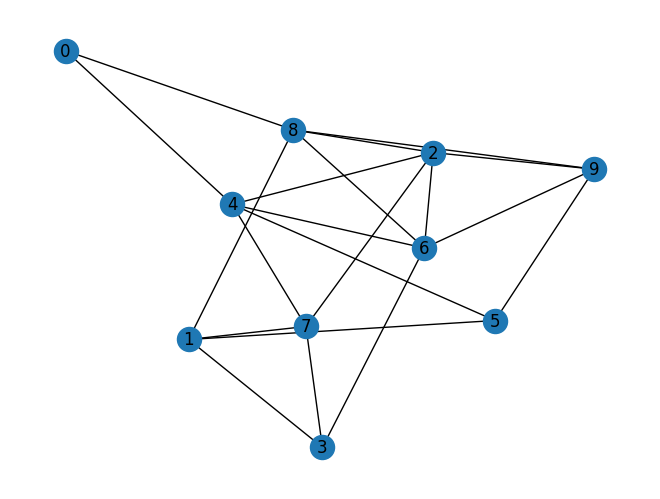

In [15]:
pos_cons = nx.spring_layout(G,seed = random_state)
nx.draw(G, pos=pos_cons,labels ={node:node for node in G.nodes()}) #spring_layout , spectral_layout
plt.draw()


In [16]:
# Get the adjacency matrix
A = nx.adjacency_matrix(G).toarray()
print("Adjacency Matrix:")
print(A)



# Get the degree matrix

# add your code here



# Get the Laplacian matrix

# add your code here

Adjacency Matrix:
[[0 0 0 0 1 0 0 0 1 0]
 [0 0 0 1 0 1 0 1 1 0]
 [0 0 0 0 1 0 1 1 1 1]
 [0 1 0 0 0 0 1 1 0 0]
 [1 0 1 0 0 1 1 1 0 0]
 [0 1 0 0 1 0 0 0 0 1]
 [0 0 1 1 1 0 0 0 1 1]
 [0 1 1 1 1 0 0 0 0 0]
 [1 1 1 0 0 0 1 0 0 1]
 [0 0 1 0 0 1 1 0 1 0]]


In [17]:
import numpy as np
import networkx as nx

# ---- Consistent node order ----
nodelist = list(G.nodes())  # or sorted(G.nodes())

# 1) Adjacency matrix (already did, but safer with nodelist)
A = nx.to_numpy_array(G, nodelist=nodelist, dtype=float)
print("Adjacency Matrix A:")
print(A)

# 2) Degree vector / Degree matrix D
deg_dict = dict(G.degree())  # {node: degree}
deg_vec  = np.array([deg_dict[v] for v in nodelist], dtype=float)
D = np.diag(deg_vec)
print("\nDegree vector:")
print(deg_vec)
print("\nDegree Matrix D:")
print(D)

# 3) (Combinatorial) Laplacian L = D - A
L = D - A
print("\nLaplacian Matrix L = D - A:")
print(L)

# 4) (Optional) Normalized Laplacian (check)
L_norm = nx.normalized_laplacian_matrix(G, nodelist=nodelist).toarray()
print("\nNormalized Laplacian L_norm:")
print(L_norm)

# 5) (Optional) Spectrum – eigenvalues of L (graph structure info)
evals, evecs = np.linalg.eigh(L)
print("\nEigenvalues of L (ascending):")
print(np.round(evals, 6))

# 6) (Optional) Sanity checks
print("\n#nodes:", G.number_of_nodes(), "  #edges:", G.number_of_edges())
print("Sum of degrees == 2*|E| ?", deg_vec.sum() == 2*G.number_of_edges())


Adjacency Matrix A:
[[0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1. 1. 0.]
 [0. 0. 0. 0. 1. 0. 1. 1. 1. 1.]
 [0. 1. 0. 0. 0. 0. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0. 1. 1. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 1. 1. 0. 0. 0. 1. 1.]
 [0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]]

Degree vector:
[2. 4. 5. 3. 5. 3. 5. 4. 5. 4.]

Degree Matrix D:
[[2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 5. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 3. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 4. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]

Laplacian Matrix L = D - A:
[[ 2.  0.  0.  0. -1.  0.  0.  0. -1.  0.]
 [ 0.  4.  0. -1.  0. -1.  0. -1. -1.  0.]
 [ 0.  0.  5.  0. -1.  0. -1. -1. -1. -1.]
 [ 0. -1.  0.  3.  0.  0. -1. -1.  0.  0.]
 [-1.  0. -1.  0.  5. -1. -1. -1.  0.  0.]
 [ 0. -1

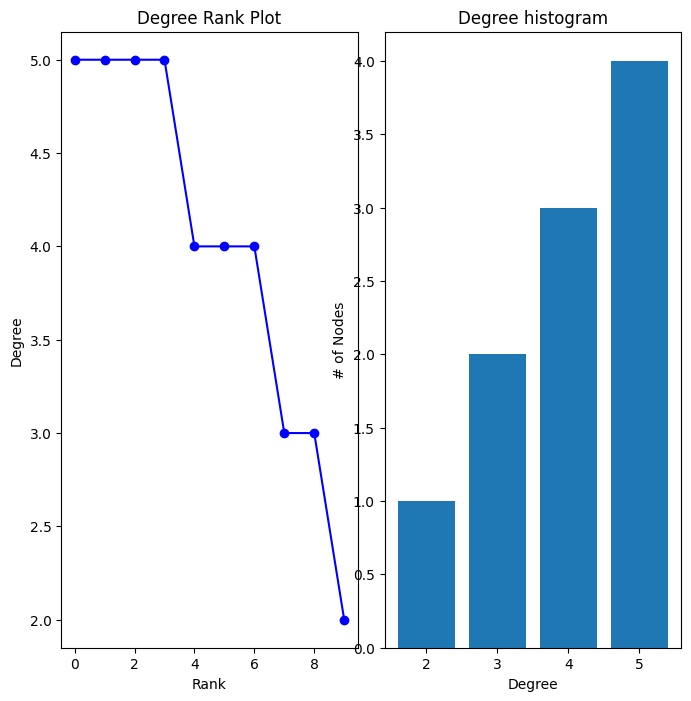

In [18]:
degree_analysis(G)

In [19]:
# calculate the graph density for the above created random graph


In [20]:
import networkx as nx

# graph G already created above
n = G.number_of_nodes()
m = G.number_of_edges()

dens_nx = nx.density(G)
dens_formula = (2*m)/(n*(n-1))

print(f"|V|={n}, |E|={m}")
print(f"Density (nx):      {dens_nx:.4f}")
print(f"Density (formula): {dens_formula:.4f}")
print(f"Average degree = 2E/N = {2*m/n:.2f}")


|V|=10, |E|=20
Density (nx):      0.4444
Density (formula): 0.4444
Average degree = 2E/N = 4.00


In [21]:
#increase the N from 20 to 200 and observe graph density and degree distribution and explain what you observe

N= 20, E=  40  |  density=0.2105  avg_degree=4.00


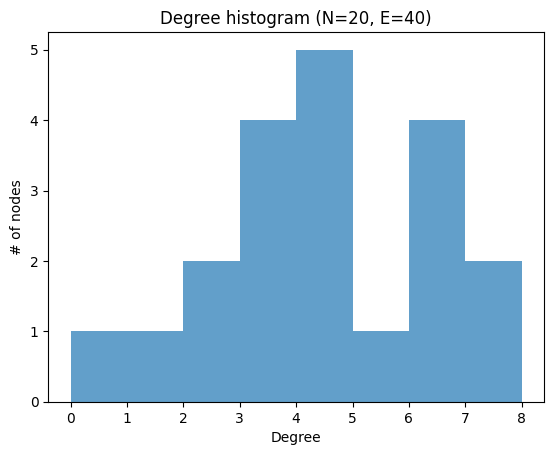

N=200, E= 400  |  density=0.0201  avg_degree=4.00


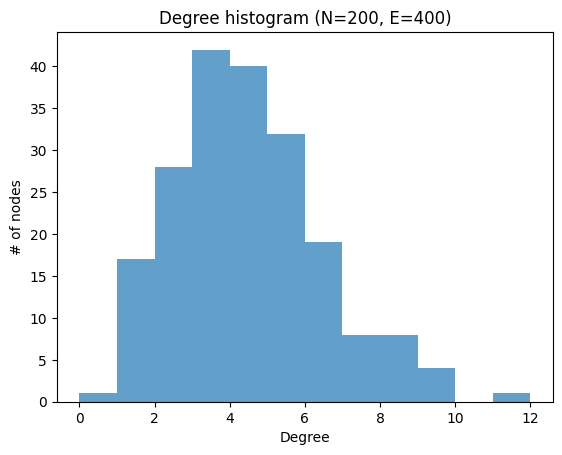

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def make_and_report(N, E, seed=42):
    G = nx.gnm_random_graph(N, E, seed=seed)   # Erdos–Rényi with fixed edges
    dens = nx.density(G)
    avg_deg = 2*E/N
    degs = np.array([d for _, d in G.degree()])
    print(f"N={N:>3}, E={E:>4}  |  density={dens:.4f}  avg_degree={avg_deg:.2f}")
    plt.hist(degs, bins=range(degs.min(), degs.max()+2), alpha=0.7)
    plt.title(f"Degree histogram (N={N}, E={E})")
    plt.xlabel("Degree"); plt.ylabel("# of nodes")
    plt.show()
    return dens, avg_deg

# Compare N=20 vs N=200 while keeping E = 2*N
d1, k1 = make_and_report(20, 40)      # density ≈ 80/(20*19) ≈ 0.2105
d2, k2 = make_and_report(200, 400)    # density ≈ 800/(200*199) ≈ 0.0201
